## Handcrafted Linear Regression Algorithm

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

data = pd.read_csv("data.csv")
data = data.dropna(subset=['Schooling', 'Life expectancy '])

In [35]:
lines, columns = data.shape

print("Lines:", lines)
print("Columns:", columns)

Lines: 2768
Columns: 22


In [36]:
X = data['Schooling'].values 
y = data['Life expectancy '].values

y = y.reshape(-1, 1)

y.shape

print(type(data['Schooling'].values))

<class 'numpy.ndarray'>


Bias

In [37]:
X_b = np.c_[np.ones((X.shape[0], 1)), X]

X_b.shape

(2768, 2)

In [38]:
def MSE_cost(X, y, theta):
    # número de exemplos no conjuto de dados
    m = len(y)

    # Cost function for linear regression: mean squared error between predictions and actual values
    # X.dot(theta) is the dot product of the vector theta - which is a vector (n+1), 1 - in this case (2, 1)
    # Squaring the difference amplifies the model's sensitivity, addressing large errors effectively


    cost = (1/(2*m)) * np.sum(np.square(X.dot(theta) - y))

    return cost

In [24]:
# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    
    # m is the number of training examples in the dataset
    m = len(y)

    cost_history = np.zeros(iterations)

    # Loop to perform the specified number of iterations
    for i in range(iterations):
        
        # Compute the gradients
        gradients = 1/m * X.T.dot(X.dot(theta) - y)

        # Update the theta parameters
        theta = theta - learning_rate * gradients

        if i % 100 == 0:  # Exibe a cada 10 iterações
            print(f"Iteration {i}: Cost = {MSE_cost(X, y, theta)}, Gradients = {gradients}")
    
    cost_history[i] = MSE_cost(X, y, theta)

        # Compute the cost with the updated theta and store it in the cost history
    cost_history[i] = MSE_cost(X, y, theta)
    
    # Return the optimized theta parameters and the cost history
    return theta, cost_history

In [47]:
# randomize everything

theta = np.random.randn(2,1) #(y = b + a*x), randomizing b and a

learning_rate = 0.001

iterations = 40000

In [40]:
theta_opt, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

Iteration 0: Cost = 1828.7773119636759, Gradients = [[ -70.51197398]
 [-871.21338144]]
Iteration 100: Cost = 85.3150123508567, Gradients = [[-3.07424757]
 [ 0.23778656]]
Iteration 200: Cost = 84.37114524740728, Gradients = [[-3.05227802]
 [ 0.23612425]]
Iteration 300: Cost = 83.44071855393996, Gradients = [[-3.0304683 ]
 [ 0.23443705]]
Iteration 400: Cost = 82.52354088268136, Gradients = [[-3.00881442]
 [ 0.23276191]]
Iteration 500: Cost = 81.61942357117071, Gradients = [[-2.98731526]
 [ 0.23109873]]
Iteration 600: Cost = 80.7281806434493, Gradients = [[-2.96596972]
 [ 0.22944744]]
Iteration 700: Cost = 79.84962877180529, Gradients = [[-2.9447767 ]
 [ 0.22780795]]
Iteration 800: Cost = 78.98358723906345, Gradients = [[-2.92373512]
 [ 0.22618017]]
Iteration 900: Cost = 78.12987790141177, Gradients = [[-2.90284389]
 [ 0.22456403]]
Iteration 1000: Cost = 77.28832515175753, Gradients = [[-2.88210193]
 [ 0.22295943]]
Iteration 1100: Cost = 76.4587558836051, Gradients = [[-2.86150818]
 [ 0.2

In [48]:
print("Modelo de Machine Lea}rning - Parâmetros Finais:\n", theta_opt)

Modelo de Machine Lea}rning - Parâmetros Finais:
 [[29.38120598]
 [ 3.24278679]]


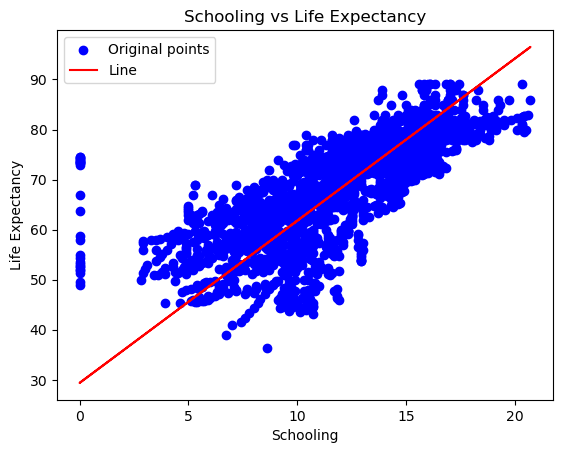

In [51]:
# Previsão com os parâmetros ajustados
y_pred = X_b.dot(theta_opt)

# Plotar os dados
plt.scatter(X, y, color='blue', label='Original points')

# Plotar a linha de regressão
plt.plot(X, y_pred, color='red', label='Line')

# Configurações do gráfico
plt.title('Schooling vs Life Expectancy')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()